# California Home Prices Analysis

## Overview

This project offers an in-depth analysis of housing prices across California, employing a robust dataset that encapsulates a wide range of features from location specifics to the number of rooms and area demographics. The objective is to understand the driving factors behind the prices and to predict the market trends that can inform both potential home-buyers and sellers.

### Objective

To extract valuable insights into the California housing market, identify key price determinants, and develop a predictive model that estimates housing prices based on various features.

### Data Source

The dataset for this analysis comes from the California census data and includes metrics such as population, median income, median housing price, and geographical coordinates of the houses.

### Tools & Methods Used

    Python: The primary language for data manipulation, analysis, and predictive modeling.
    Pandas & Numpy: For data manipulation and numerical computations.
    Matplotlib & Seaborn: For generating insightful visualizations of the data distributions and trends.
    Scikit-learn: For building regression models to predict housing prices and evaluate model performance using techniques like cross-validation and GridSearchCV for hyperparameter tuning.
    Geo-spatial Analysis: Utilizing longitude and latitude data to analyze geographical influences on housing prices.

### Key Findings

    Geographical location, particularly proximity to the coast, significantly affects housing prices.
    The median income of an area is a strong predictor of housing market prices, highlighting economic disparity.
    Additional insights into how the size and age of properties correlate with their market value.

### Potential Implications

The findings and predictive models from this project can serve as a framework for real estate stakeholders to understand price trends and could be a stepping stone towards developing AI-driven real estate valuation tools.

# Initialization

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
%matplotlib inline
sns.set_style('darkgrid')

# Create a data frame
df = pd.read_csv("housing.csv")

# Preview the data
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Show the counts and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Missing Data
In this dataset, the 'total_bedrooms' column is the only one with missing data. Given that these missing values are confined to a single numeric column and represent a small portion of the dataset, a practical approach is to use the statistical mode to impute these values. This method preserves the integrity of the data while effectively addressing the gaps.

In [3]:
# Return the first values of the column to better understand the data
df["total_bedrooms"].head(5)

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [2]:
# Fill null values in the 'total_bedrooms' column with the mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# Exploratory Data Analysis

## Ocean Proximity

Drawing on widely accepted real estate principles, it is reasonable to hypothesize that a home's proximity to the ocean will be a significant predictor of its value. Coastal properties often command premium prices due to their desirable views, the serene ambiance of a waterfront, and the recreational opportunities they offer. Moreover, such locations are frequently associated with a higher quality of life, which includes cleaner air, opportunities for water sports, and a general prestige attached to oceanfront living.

In the context of California, with its extensive and varied coastline, this factor might play an even more pronounced role. The state's coastal regions are home to some of the most sought-after real estate markets in the world, where properties are not just residences but also investments that hold value due to their limited supply. It's not just the immediate access to the beach that adds value but also the temperate climate and the cultural value associated with California's coastal lifestyle. These attributes can significantly influence housing prices and are expected to be reflected in this data analysis, providing valuable insights for potential buyers, investors, and policymakers.

In [3]:
# Encode the 'ocean_proximity' column
ocean_encoded = pd.get_dummies(df['ocean_proximity'])

# Concatenate the new columns with 'median_house_value'
df_with_encoded = pd.concat([ocean_encoded, df['median_house_value']], axis=1)

# Calculate correlation of each encoded column with 'median_house_value'
correlation_values = df_with_encoded.corr()['median_house_value'].drop('median_house_value')

# Print the correlation values
print(correlation_values)

<1H OCEAN     0.256617
INLAND       -0.484859
ISLAND        0.023416
NEAR BAY      0.160284
NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64


These numbers are the **correlation coefficients** between the **median house value** and the **proximity to the ocean** for different areas in California. Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). A positive correlation coefficient indicates that the two variables are positively related, meaning that as one variable increases, the other variable also increases. A negative correlation coefficient indicates that the two variables are negatively related, meaning that as one variable increases, the other variable decreases. In this case, the correlation coefficient for **INLAND** is negative, which means that as the proximity to the ocean decreases, the median house value tends to decrease as well. The correlation coefficient for **1H OCEAN** is positive, which means that as the proximity to the ocean increases, the median house value tends to increase as well. The correlation coefficients for **ISLAND**, **NEAR BAY**, and **NEAR OCEAN** are all positive, but their magnitudes are relatively small, indicating that the proximity to these bodies of water has a weaker effect on the median house value ¹.

In [7]:
# Return the counts of each unique category in the column
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

This data reveals a predominance of properties located within an hour of the ocean, indicating a significant dataset focus on these regions. Listings situated inland also represent a substantial portion, reflecting the breadth of California's geography in our analysis. Properties labeled as 'near ocean' and 'near bay' are less frequent, which is expected given the limited availability of waterfront real estate. Island properties are the rarest in the dataset, underscoring their exclusivity and the potential unique market dynamics they may present.

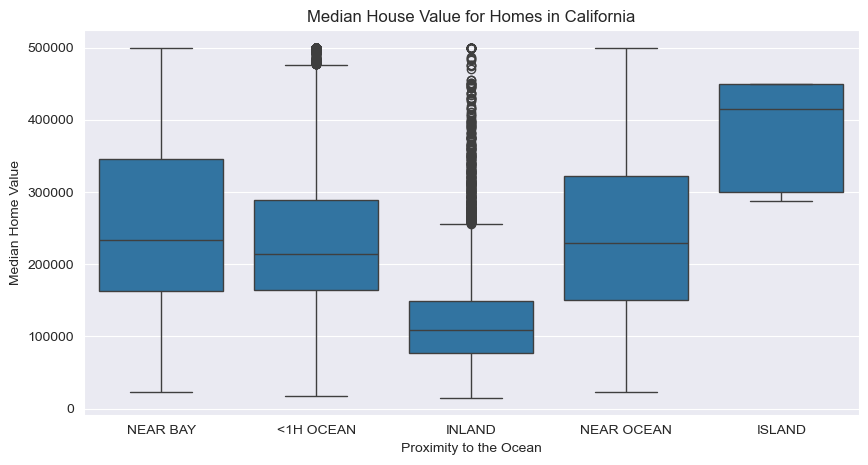

In [6]:
# Create the plot
plt.figure(figsize=(10, 5))

# Create the chart
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

# Customize the chart
plt.title('Median House Value for Homes in California')
plt.ylabel('Median Home Value')
plt.xlabel('Proximity to the Ocean')

# Display the chart
plt.show()

The above chart displays the average home price of each category in relation to the proximity of the ocean. It can be interpreted the following way:

    Inland: The inland category shows a wide range of house values, from very low to quite high, with a substantial number of outliers on the higher end. This suggests that while inland areas may generally have more affordable housing, there are still areas inland with significantly higher property values, which could be due to factors such as proximity to urban centers, local economies, or other desirable features like natural resources or cultural hubs.

    <1H Ocean: Homes within one hour of the ocean show higher median values than inland homes, reflecting the desirability of living near the coast. There are fewer outliers, indicating more uniformity in housing prices compared to inland areas.

    Near Ocean: This category has a similar median value to homes within one hour of the ocean, but with a tighter interquartile range, suggesting less variability in the house values close to the ocean.

    Near Bay: Houses near the bay have a higher median value than those near the ocean and those within one hour of the ocean. The range is narrower, and there are outliers indicating some houses significantly exceed the average values.

    Island: Island properties show the highest median value and the least variability, with almost no outliers. This could be due to the exclusive nature and limited availability of island properties.

The potential outliers in the inland section may be due to a variety of factors:

    Luxury Homes: There could be luxury properties or estates that significantly exceed the average property values in these areas.

    Development: New developments with higher-end homes can also skew the values upward.

    Economic Hubs: Inland areas that are economic or technological hubs, such as Silicon Valley, can have much higher property values.

    Geographical Features: Proximity to mountains, lakes, or other desirable natural features can increase the value of properties even if they are inland.

These outliers are important to note as they can represent a different market segment within the inland category that might appeal to a different type of buyer than the typical inland property.

In [4]:
# Splitting the column into seperate columns for each category and removing the original column from the data frame
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [5]:
# Removing 'ISLAND' as it is such a low amount of data and has little correlation with home value
df.drop("ISLAND", axis=1, inplace=True)

### Geographic Location

The impact of ocean proximity on home values can be further seen by focusing on specific geographic data, namely longitude and latitude. These coordinates offer precise details about a property's location, down to specific elements like a particular neighborhood or street. The longstanding real estate adage, "location, location, location," emphasizes the importance of geographic positioning, especially in terms of a property's desirability and convenience. By using longitude and latitude data, we can quantitatively assess how the proximity to the ocean influences the median home value.

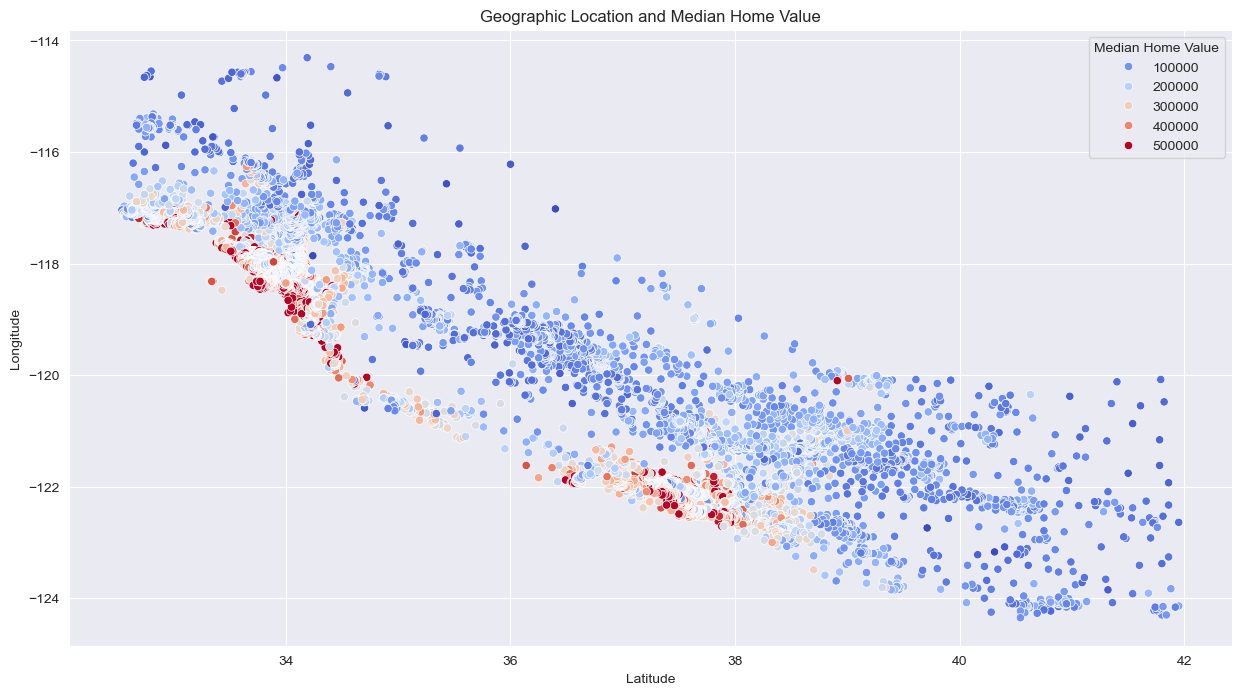

In [9]:
# Plots the position of the home and shows higher median home value as warmer colors

# Create the plot
plt.figure(figsize=(15,8))

# Create the chart
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm");

# Customize the plot
plt.title('Geographic Location and Median Home Value')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Median Home Value')

# Show the plot
plt.show()

The coastal areas have a concentration of higher median house values, denoted by the red dots. This pattern supports the common understanding that properties closer to the coast are more expensive due to the desirable ocean proximity. The coastal premium can be attributed to various factors such as ocean views, beach access, and a temperate climate.

Moving inland, the values seem to decrease, as indicated by the transition to blue dots, suggesting that homes further from the coast tend to be less expensive. However, there are notable exceptions where inland areas also show higher values, which could be due to the presence of major cities or other desirable living conditions such as community amenities, job opportunities, or historical significance.

The scatter plot serves not just as a tool for visualizing data but also as a geographical representation, showing how housing prices are intrinsically linked to their location within the state. This visualization can be particularly useful for potential buyers, investors, or policymakers interested in the dynamics of the housing market in California.

## Income

Income levels are anticipated to be a significant determinant of median home values. Generally, individuals with higher incomes have greater purchasing power, which often translates into the ability to afford higher-priced homes. This trend is rooted in the correlation between financial resources and the quality of housing one can secure. As income increases, so does access to a broader range of housing options, including those in more desirable locations or with more amenities, which are typically more costly. Consequently, areas with higher average incomes may also exhibit higher median home values, reflecting the economic status of the residents. This relationship is a critical factor for real estate analysis, as it underpins the fundamental economic principles of supply and demand within the housing market. Understanding this dynamic is essential for predicting housing prices and can influence investment decisions, urban planning, and policy-making.

In [11]:
# Calculate the correlation of 'median_income' with 'median_house_value'
income_correlation = df['median_income'].corr(df['median_house_value'])

# Print the correlation value
print(income_correlation)

0.6880752079585479


The coefficient of 0.69 indicates a strong positive correlation between the median home income and the median house value. A positive correlation coefficient indicates that the two variables are positively related, meaning that as one variable increases, the other variable also increases. To further prove the relationship between median income and median house value we can conduct a hypothesis test.

### Hypothesis Test

In [12]:
# Importing necessary libraries for the regression analysis
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable (y) and independent variables (X)
# Add a constant to the independent variables to include the intercept in the regression
X = df['median_income']
y = df['median_house_value']
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:45:48   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results

The regression analysis results provided indicate the following:

Model Summary:

**R-squared**: The R-squared value is 0.473, meaning that approximately 47.3% of the variance in median home value is explained by median income. This is a substantial proportion and suggests that median income is a strong predictor of median home value.

**F-statistic**: The F-statistic is very high (1.856e+04), and the associated p-value is extremely small (essentially zero), indicating that the regression model is statistically significant. This means that the median income is a significant predictor of median home value in the population from which the sample was drawn.

**Coefficients**: The coefficient for median_income is approximately 4.179e+04. This implies that for each unit increase in median income, the median home value increases by roughly $41,790.
        
The p-value for the median_income coefficient is very small (essentially zero), indicating that we can reject the null hypothesis and conclude that there is a statistically significant relationship between median income and median home value.

## Household Age

The median household age in a particular area is an intriguing demographic metric that can shed light on the community's stability, historical growth patterns, and potential future development. In the context of California's dynamic real estate market, the median age of households may reflect generational shifts, migration trends, or economic factors that influence both the supply and demand of housing and thus home values. A younger median household age might correlate with newer housing developments and a more transient population, while an older median age could indicate established neighborhoods with potentially higher home values due to the desirability and limited supply of homes.

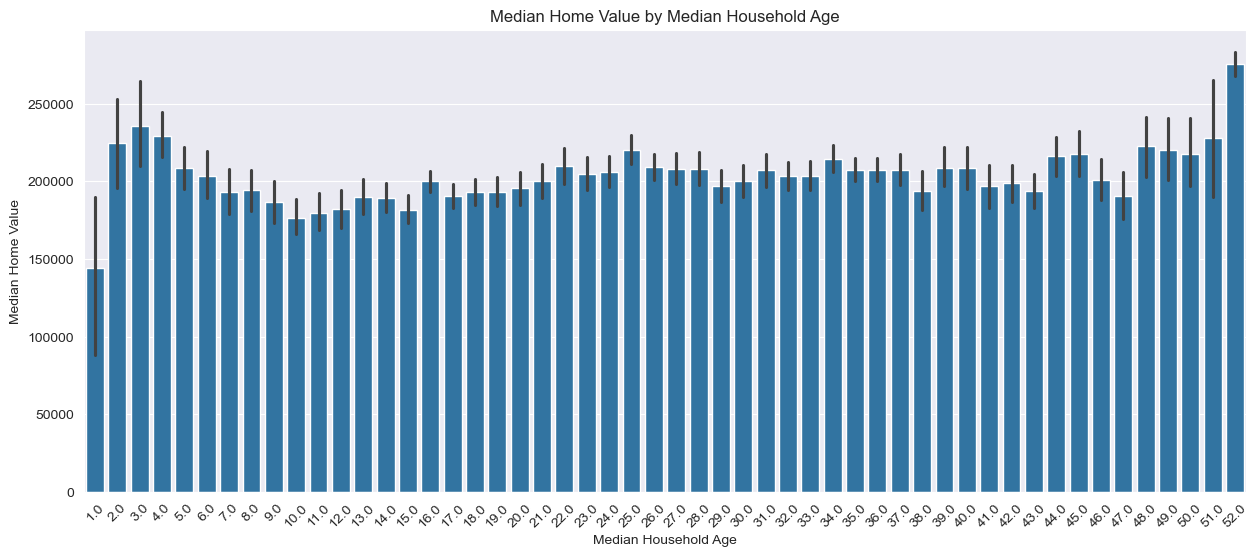

In [13]:
# Chart displaying the change in median home value based on the number of rooms in a household
# Create the plot
plt.figure(figsize=(15, 6))

# Create a bar chart
sns.barplot(x='housing_median_age',y='median_house_value', data=df);

# Customize the plot
plt.title('Median Home Value by Median Household Age')
plt.xlabel('Median Household Age')
plt.ylabel('Median Home Value')
plt.xticks(rotation=45)  # Rotate the labels to 45 degrees

# Display the plot
plt.show()

Analyzing the attached chart, we observe a distribution of median home values across various median household ages in California. The bar graph illustrates a notable variance in home values that do not immediately suggest a direct or simple relationship with the age of households. While there is a visible range of values at each age level, there appears to be no clear upward or downward trend that would indicate a strong correlation between the two variables. This suggests that while household age is a factor to consider, it may not be a primary determinant of home values on its own. The chart also indicates a high level of data concentration in certain age brackets, which could be indicative of common household age groups or popular homebuying stages. Further statistical analysis is required to ascertain the strength and nature of the relationship between median household age and home values in the region.

### Hypothesis Test

To conduct a hypothesis test on the relationship between median household age and median home value, we can perform a linear regression analysis and use the t-statistic from the regression output to test the null hypothesis.

The hypothesis would be formulated as follows:

**Null Hypothesis** (H0): There is no effect of median household age on median home value. (The coefficient of median household age in the regression equation is zero.)
**Alternative Hypothesis** (H1): There is an effect of median household age on median home value. (The coefficient of median household age is not zero.)

In [14]:
# Define the dependent variable (y) and independent variables (X)
# Add a constant to the independent variables to include the intercept in the regression
X = df['housing_median_age']
y = df['median_house_value']
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.76e-52
Time:                        17:46:04   Log-Likelihood:            -2.6975e+05
No. Observations:               20640   AIC:                         5.395e+05
Df Residuals:                   20638   BIC:                         5.395e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.791e+05   1985.416     90.218      0.000    1.75e+05    1.83e+05
housing_median_age   968.4496     63.467     15.259      0.000     844.050    1092.850
==============================================================================
Omnibus:                     2269.585   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3093.615
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       3.281   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results

The results from the regression analysis of the entire dataset indicate the following:

**Sample Size**: The model was fit using 20,640 observations, which is a robust sample size for regression analysis.

**R-squared**: The R-squared value is 0.011. This indicates that only 1.1% of the variability in the median home value can be explained by the median age of the household. This is a very small proportion, suggesting that median household age alone does not strongly predict median home value.

**F-statistic and Prob (F-statistic)**: The F-statistic is 232.8 with a very small p-value (approx. 2.76e-52), which is essentially zero. This suggests that the overall model is statistically significant, meaning that the median household age, as a predictor, has a significant relationship with median home value at the population level.

**Coefficient** for Median Household Age: The coefficient for housing_median_age is 968.4466 with a very small p-value (approx. 0.000), which is essentially zero. This means that for each additional year of median household age, the median home value increases by approximately $968.45. Despite the small effect, this relationship is statistically significant.

In summary, while the model is statistically significant, the low R-squared value indicates that median household age alone is not a strong predictor of median home value. 

## Correlational Analysis

Establishing a robust foundation for machine learning modeling necessitates a comprehensive understanding of the intricate relationships within the data. Prior to initiating any predictive modeling, it is imperative to identify and scrutinize the features that exhibit a strong correlation with the target variable. This investigative step is crucial as it illuminates the factors most influential in predicting the outcomes we are interested in. By quantifying the degree of association between each feature and the target variable through methods such as correlation coefficients or mutual information scores, we can prioritize the most relevant predictors. This not only enhances the potential accuracy of the model but also provides valuable insights into the nature of the dataset, guiding feature engineering and the selection of an appropriate modeling algorithm. A meticulous evaluation of feature correlations also aids in avoiding the pitfalls of including irrelevant or redundant data, which could otherwise lead to overfitting or underperformance in unseen data scenarios.

In [16]:
# Calculate the correlation values of each feature with 'median_house_value'
correlation_value = df.corr()['median_house_value']

# Print the correlation values
print(correlation_value)

longitude            -0.045967
latitude             -0.144160
total_rooms           0.134153
total_bedrooms        0.049406
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
<1H OCEAN             0.256617
INLAND               -0.484859
NEAR BAY              0.160284
NEAR OCEAN            0.141862
Name: median_house_value, dtype: float64


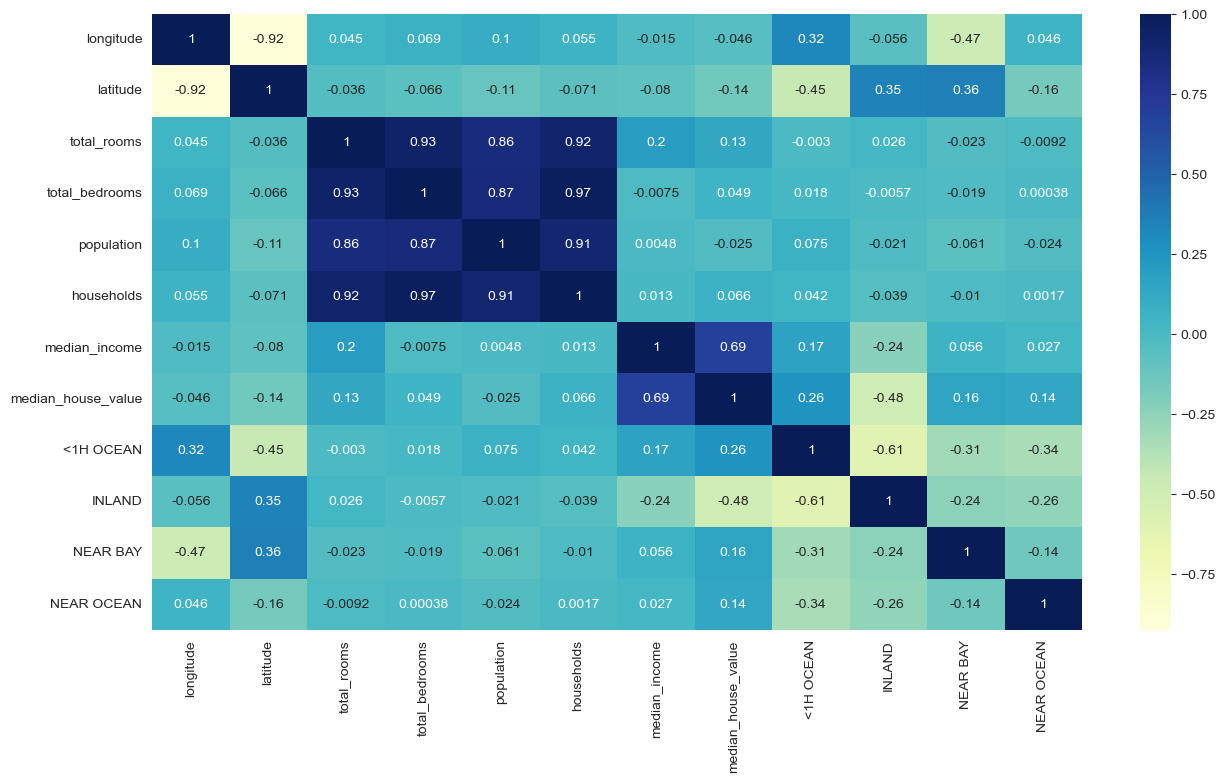

In [18]:
# Creates a heatmap showing the correlation values between features in the dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

Analyzing the above correlations and heatmap we can derive several insights:

    Median Income: There is a strong positive correlation between median income and median house value. This is expected as households with higher incomes can afford more expensive homes. The correlation coefficient is around 0.69, suggesting a significant positive relationship.

    Proximity to the Ocean: Generally, properties closer to the ocean (NEAR OCEAN and <1H OCEAN) tend to have higher values, possibly due to the desirability of such locations.

    Latitude and Longitude: Both latitude and longitude show a negative correlation with median house value, with latitude having a stronger correlation. This might suggest that homes at certain latitudes and longitudes (likely corresponding to specific regions in California) are more expensive. For example, this could reflect the higher prices in the northern coastal areas compared to other regions.

    House Age: There is a slight negative correlation between the housing_median_age and median house value, suggesting that newer houses tend to be more expensive, although the relationship isn't very strong.

    Room and Bedroom Counts: Total rooms and total bedrooms have a low positive correlation with median house value. However, the bedroom ratio (bedrooms/rooms) has a negative correlation, indicating that houses with a higher proportion of bedrooms relative to the total number of rooms are not necessarily more valuable. This could reflect a preference for larger living spaces over a higher number of bedrooms.

    Population and Households: The population and number of households have very weak correlations with median house value. This indicates that these factors by themselves are not strong predictors of house value in this dataset.

    Size of the Household: There is a negative correlation between the household size (household_pop, which might be population per household) and the median house value. This might indicate that areas with larger households, potentially implying more crowded living conditions, have lower median house values.

In summary, median income is a strong predictor of house value in California, likely due to higher buying power. Proximity to the ocean is also an important factor, reflecting the desirability of coastal locations. The age of the house, the total number of rooms, and the distribution of bedrooms also play roles but are less influential than income and location. The relatively weaker correlations for latitude, longitude, population, and household size suggest that these factors are less directly tied to house values or may reflect more complex regional variations.

# Machine Learning Model

### Feature Enginering 

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Create Evaluation Function for Regression

def evaluate_regression_preds(y_true, y_preds):
    """
    Evaluates common metrics for a regression model.
    Args:
    'y_true' = True values of data
    'y_preds' = Predictions made by model
    """
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_preds)

    metric_dict = {"MAE": round(mae, 2),
                   "MSE": round(mse, 2),
                   "RMSE": round(rmse, 2),
                   "R^2": round(r2, 2)}
    
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    
    return metric_dict

In [7]:
# Create a column to contain population per household in both data sets
df['household_pop'] = df['population'] / df['households']

# Creates a column to examine the ratio of bedrooms to total rooms
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']

# Create a column to examine the ratio of rooms to the number of households
df['household_rooms'] = df['total_rooms'] / df['households']

### Random Forest Regressor

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create a variables
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the Model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Create predictions
y_preds = reg.predict(X_test)

# Evaluate our baseline model
evaluate_regression_preds(y_test, y_preds)

MAE: 32510.99
MSE: 2413438759.60
RMSE: 49126.76
R^2: 0.82


{'MAE': 32510.99, 'MSE': 2413438759.6, 'RMSE': 49126.76, 'R^2': 0.82}

### Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a k-fold cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
cv_scores = cross_val_score(reg, X, y, cv=kf)

print(f"The cross validated R^2: {cv_scores.mean().round(2)}")

The cross validated R^2: 0.81


## Improving the Model using RandomizedSearchCV and GridSearchCV

In [18]:
# Import Randomized Search
from sklearn.model_selection import RandomizedSearchCV

# Create a parameter grid
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rs_reg = RandomizedSearchCV(estimator=reg,
                           param_distributions=param_grid,
                           n_iter=10, #num of models to try
                           cv=5)
# Fit the data
rs_reg.fit(X_train, y_train);

In [19]:
rs_reg.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 8,
 'max_depth': None,
 'bootstrap': False}

In [22]:
# Import GridSearch
from sklearn.model_selection import GridSearchCV

# Create the Regression Model
reg = RandomForestRegressor()

# Create a parameter grid
param_grid = {
    "n_estimators": [30],
    "max_features": [8],
    "max_depth": [None],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [2],
    "bootstrap": [False]
}

# Create a grid search for the best model given the parameters
gs_reg = GridSearchCV(reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Fit the data
gs_reg.fit(X_train, y_train)

# Create Predictions
y_preds = gs_reg.predict(X_test)

# Evaluate Predicitons
evaluate_regression_preds(y_test, y_preds)

MAE: 31300.09
MSE: 2264378128.54
RMSE: 47585.48
R^2: 0.83


{'MAE': 31300.09, 'MSE': 2264378128.54, 'RMSE': 47585.48, 'R^2': 0.83}

Model Evaluation: The predictions are evaluated against the true values (y_test) using several metrics:

   - MAE (Mean Absolute Error): The average absolute difference between the predicted values and the actual values. It's a measure of the average magnitude of the errors, regardless of their direction. Lower values are better.
   - MSE (Mean Squared Error): The average of the squares of the errors. It penalizes larger errors more than smaller ones. Lower values are better.
   - RMSE (Root Mean Squared Error): The square root of the mean squared error. It is in the same units as the target variable and is often more interpretable for this reason. Lower values are better.
   - R^2 (R-squared or Coefficient of Determination): This indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better fit.

Results Interpretation:

   - The MAE is approximately 31300.89, which means that the average error in the predictions is around $31,300.
   - The MSE is approximately 264375818.54, suggesting that there is a significant variance in the errors of the predictions.
   - The RMSE is 47585.48, which, similar to the MAE, gives an average error (in the same units as the target variable), but with a higher penalty for large errors.
   - The R^2 value is 0.83, which means that the model explains 83% of the variance in the target variable, indicating a relatively high level of predictive power.

### Export Model using Pickle

In [24]:
import pickle

# Save model to file
pickle.dump(gs_reg, open("gs_random_forest_regressor_1.pkl", "wb"))

# Conclusion

In conclusion, our comprehensive analysis of the California housing market has yielded valuable insights that can guide future real estate investments, urban planning, and economic policy. The strong positive correlation of 0.69 between median income and median house value underscores the foundational economic principle that higher income levels are conducive to the purchase of more expensive homes. This relationship is a testament to the purchasing power wielded by affluence and its influence on the real estate market.

The allure of coastal living is evident from the data, with properties in proximity to the ocean—especially those categorized as NEAR OCEAN and <1H OCEAN—fetching higher prices. This trend highlights the premium that buyers are willing to pay for the quintessential ocean view and lifestyle, confirming the enduring appeal of seaside locations.

Geographical influences are also at play, with latitude and longitude exhibiting a negative correlation with median house value, and latitude showing a more pronounced effect. This pattern likely reflects the regional variances within California's diverse landscape, where northern coastal areas command higher property values compared to other regions.

While the age of housing shows only a slight negative correlation with median house values, suggesting a moderate preference for newer homes, the analysis reveals a more nuanced perspective on home size and composition. Homes with more rooms are slightly more valued, yet a higher bedroom-to-room ratio does not equate to higher value, possibly indicating a preference for spaciousness.

Interestingly, demographic factors such as population and household numbers show a negligible correlation with house values, indicating these aspects alone do not predict housing prices effectively in this dataset. Additionally, areas with larger households, which may indicate more densely populated living conditions, tend to have lower median house values, perhaps reflecting market preferences towards less crowded living spaces.

The project's culmination was the development of a robust machine learning model to predict housing values. The model's performance, as determined through grid search optimization and k-fold cross-validation, is commendable, with a mean cross-validation score of 0.82 and negligible variability. This suggests that the model is both accurate and stable, providing reliable predictions that could be leveraged by stakeholders to make informed decisions in the housing market.

The convergence of data-driven insights and advanced modeling techniques in this project not only paints a clearer picture of the current housing landscape but also sets the stage for predictive analytics to play a pivotal role in shaping the future of real estate in California.